In [1]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from gensim import corpora
import gensim
import pyLDAvis
import os
import pandas as pd
from sklearn.feature_extraction import text 
import warnings

warnings.simplefilter('ignore')

os.chdir("c:/project")
tokenizer = RegexpTokenizer(r'\w+')

# Create PorterStemmer
p_stemmer = PorterStemmer()
wn_lemmatizer = WordNetLemmatizer()

#Include additional useless words as stop words
additional_stop_words = ["s", "u", "company", "corporation", "state", "unit",\
                         "american", "product", "service", "headquarter"]

stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)

def preProcess(text):
    raw = str(text).lower()
    tokens = tokenizer.tokenize(raw)
    
    # get lemma  from tokens
    lemma_tokens = [wn_lemmatizer.lemmatize(i) for i in tokens]

    # remove stop words from tokens
    stopped_tokens = [i for i in lemma_tokens if not i in stop_words]
    
    # stem tokens
    #stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    return stopped_tokens


C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:819: DeprecationWarning: invalid escape sequence \w
  if re.match('\w:', url) or re.match(r'\\', url):
C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:947: DeprecationWarning: invalid escape sequence \s
  if re.search('^\s', token) or re.search('\s$', token):
C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:947: DeprecationWarning: invalid escape sequence \s
  if re.search('^\s', token) or re.search('\s$', token):
C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:3650: DeprecationWarning: invalid escape sequence \|
  elif re.match('(or|\|\|)', conditional):
C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:3880: DeprecationWarning: invalid escape s

In [2]:
# Read the data file
df = pd.read_csv("data2.csv")

df.columns = ['comp_id', 'name', 'desc', 'industry']
df

,comp_id,name,desc,industry
0,0,20th Century Fox,Twentieth Century Fox Film Corporation (known ...,Entertainment
1,1,21st Century Fox,Twenty-First Century Fox Inc. (stylized as 21s...,Mass Media
2,2,24 Hour Fitness,24 Hour Fitness is the world's largest (by mem...,Fitness
3,3,2K Games,"2K Games, Inc. is an American video game publi...",Video games
4,4,3M,"The 3M Company, formerly known as the Minnesot...",Conglomerate
5,5,42 Technologies Inc.,42 Technologies Inc. is a cloud-based business...,Software
6,6,4Licensing Corporation,The 4Licensing Corporation (formerly known unt...,Licensing
7,7,4moms,4moms is a business name of Thorley Industries...,Software
8,9,A&W Restaurants,"A&W Restaurants, Inc., is a chain of fast-food...",Food
9,10,A. O. Smith,A. O. Smith Corporation is an American manufac...,Manufacturing


In [3]:
df['tokens'] = list(map(preProcess, df['desc']))
df

,comp_id,name,desc,industry,tokens
0,0,20th Century Fox,Twentieth Century Fox Film Corporation (known ...,Entertainment,"[twentieth, century, fox, film, known, twentie..."
1,1,21st Century Fox,Twenty-First Century Fox Inc. (stylized as 21s...,Mass Media,"[century, fox, stylized, 21st, century, fox, s..."
2,2,24 Hour Fitness,24 Hour Fitness is the world's largest (by mem...,Fitness,"[24, hour, fitness, world, largest, membership..."
3,3,2K Games,"2K Games, Inc. is an American video game publi...",Video games,"[2k, game, video, game, publisher, notable, ti..."
4,4,3M,"The 3M Company, formerly known as the Minnesot...",Conglomerate,"[3m, known, minnesota, mining, manufacturing, ..."
5,5,42 Technologies Inc.,42 Technologies Inc. is a cloud-based business...,Software,"[42, technology, cloud, based, business, busin..."
6,6,4Licensing Corporation,The 4Licensing Corporation (formerly known unt...,Licensing,"[4licensing, known, november, 16, 1995, leisur..."
7,7,4moms,4moms is a business name of Thorley Industries...,Software,"[4moms, business, thorley, industry, llc, make..."
8,9,A&W Restaurants,"A&W Restaurants, Inc., is a chain of fast-food...",Food,"[w, restaurant, chain, fast, food, restaurant,..."
9,10,A. O. Smith,A. O. Smith Corporation is an American manufac...,Manufacturing,"[o, smith, manufacturer, residential, commerci..."


In [4]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(df['tokens'])
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

In [5]:
import time
start_time = time.time()
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=100, id2word = dictionary, passes=5)

print("Time for LDA model is %s seconds" % (time.time() - start_time))

Time for LDA model is 554.9037387371063 seconds


In [6]:
start_time = time.time()
# generate HDP model
hdpmodel = gensim.models.hdpmodel.HdpModel(corpus, id2word = dictionary)

print("Time for HDP model is %s seconds" % (time.time() - start_time))

Time for HDP model is 18.88308024406433 seconds


In [7]:
# Get the topic or industry for each company
from operator import itemgetter
lda_doc_topic=[]
hdp_doc_topic=[]
for x in corpus:
    lda_topics = ldamodel[x]
    hdp_topics = hdpmodel[x]
    
    lda_doc_topic.append(max(lda_topics, key=itemgetter(1))[0])
    hdp_doc_topic.append(max(hdp_topics, key=itemgetter(1))[0])
    
df['lda_topic'] = lda_doc_topic
df['hdp_topic'] = hdp_doc_topic

In [8]:
df_sub = df[df.industry.notnull()]

def calc_accuracy(dclass, dclust):
    """ Calculate Precision, Recall and F-score for companies that has industry
    """
    doc2clust = {}; doc2cat = {}
    doc2cat = dict((i,[doc]) for i,doc in enumerate(dclass))
    doc2clust = dict((i,[doc]) for i,doc in enumerate(dclust))

    dict1 = {}; dict2 = {}; prec = 0.0; rec = 0.0
    for l in doc2clust:
        if doc2clust[l][0] not in dict1:
            dict1[doc2clust[l][0]] = set([])
        dict1[doc2clust[l][0]].add(int(l))
 
    for l in doc2cat:
        if doc2cat[l][0] not in dict2:
            dict2[doc2cat[l][0]] = set([])
        dict2[doc2cat[l][0]].add(int(l))
 
    for doc in doc2cat:
        prec += ( float(len(dict1[doc2clust[doc][0]] & dict2[doc2cat[doc][0]])) / float(len(dict1[doc2clust[doc][0]])) )
        rec  += ( float(len(dict1[doc2clust[doc][0]] & dict2[doc2cat[doc][0]])) / float(len(dict2[doc2cat[doc][0]])) )
 
    prec = prec / float(len(doc2clust))
    rec = rec / float(len(doc2cat))
    fmeasure = 2.0 * prec * rec / (prec + rec);
 
    return prec, rec, fmeasure

In [9]:
lda_p, lda_r, lda_f = calc_accuracy(list(df_sub['industry']), list(df_sub['lda_topic']))
print("LDA Model Precision: %f, Recall: %f, F-Score: %f" % (lda_p, lda_r, lda_f))

LDA Model Precision: 0.387464, Recall: 0.363041, F-Score: 0.374855


In [10]:
hdp_p, hdp_r, hdp_f = calc_accuracy(list(df_sub['industry']), list(df_sub['hdp_topic']))
print("HDA Model Precision: %f, Recall: %f, F-Score: %f" % (hdp_p, hdp_r, hdp_f))

HDA Model Precision: 0.213522, Recall: 0.561530, F-Score: 0.309396


In [11]:
import pyLDAvis.gensim
lda_vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(lda_vis)

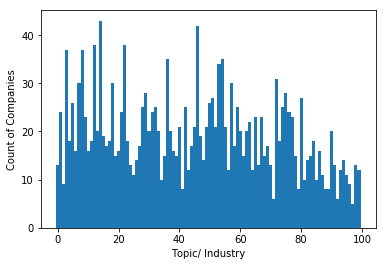

In [16]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
%matplotlib inline
labels, values = zip(*Counter(lda_doc_topic).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
#plt.xticks(indexes + width * 0.5, labels)

#plt.bar([0:150],topicsDist)
plt.ylabel('Count of Companies')
plt.xlabel('Topic/ Industry')
plt.show()

In [12]:
hdp_vis = pyLDAvis.gensim.prepare(hdpmodel, corpus, dictionary)
pyLDAvis.display(hdp_vis)

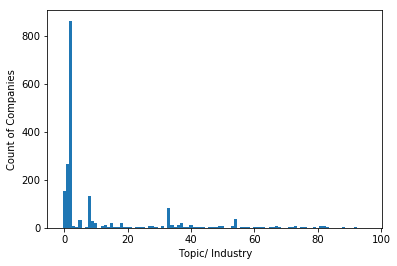

In [17]:
h_labels, h_values = zip(*Counter(hdp_doc_topic).items())

h_indexes = np.arange(len(h_labels))
width = 1

plt.bar(h_indexes, h_values, width)
#plt.xticks(indexes + width * 0.5, labels)

#plt.bar([0:150],topicsDist)
plt.ylabel('Count of Companies')
plt.xlabel('Topic/ Industry')
plt.show()